### 군집 알고리즘

비지도 학습이란 머신러닝의 한 종류로 훈련 데이터에 Label(y) 값이 없는 것이다. 비지도 학습 방법으로는 군집 차원축소 등이 있다.

군집은 비슷한 샘플끼리 하나의 그룹으로 묶는 비지도 학습의 하나로 군집 알고리즘으로 모은 샘플들을 클러스터라고 말한다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits = np.load('C:/Users/keoungchan/Downloads/fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


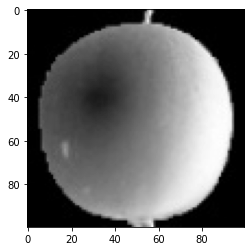

In [5]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

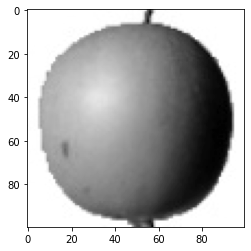

In [6]:
plt.imshow(fruits[0], cmap='gray_r') 
plt.show()

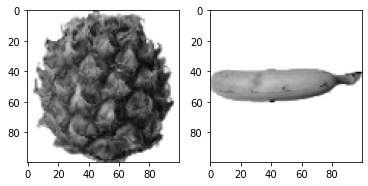

In [7]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [8]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
apple.shape

(100, 10000)

In [9]:
apple.mean(axis=1)  

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

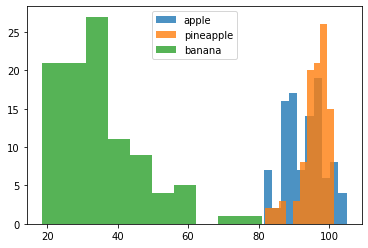

In [10]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

히스토그램이란 값이 발생한 빈도를 그래프로 표시한 것이다.

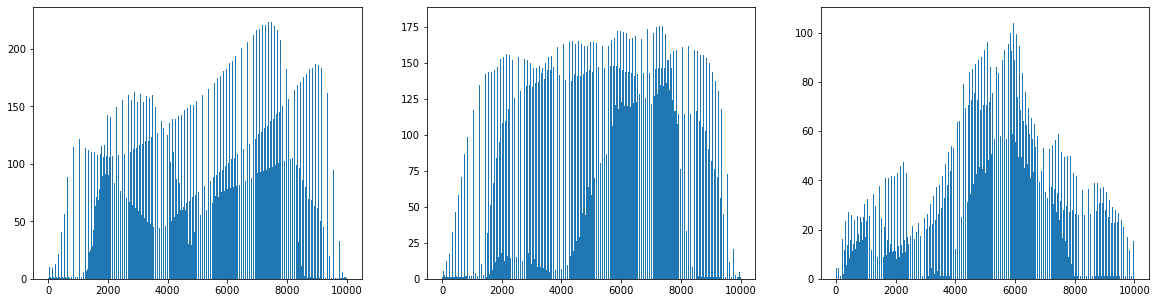

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

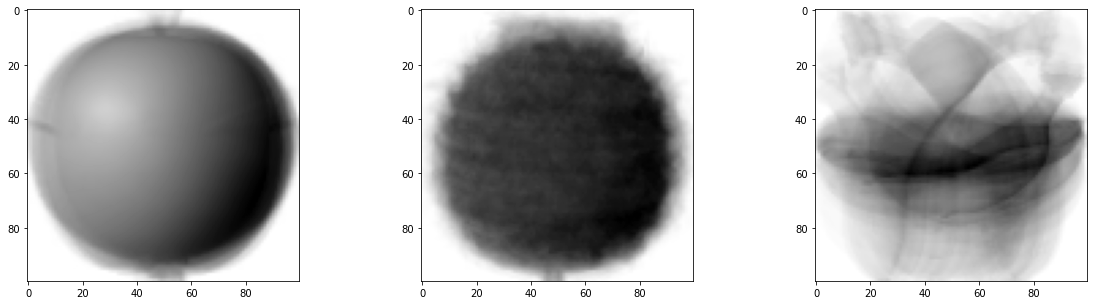

In [12]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [13]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


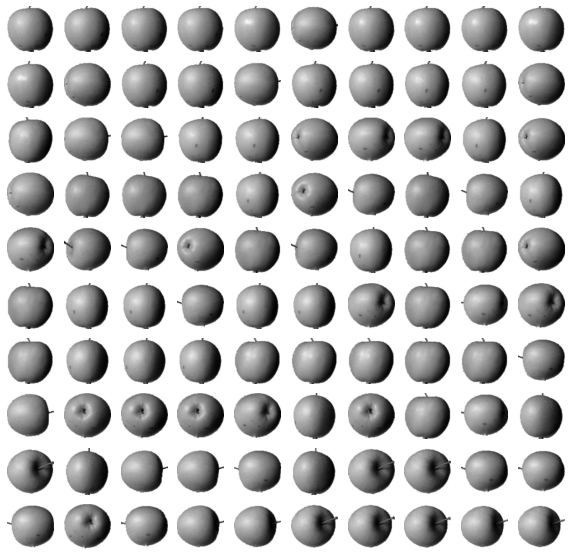

In [14]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

### K-평균

k-means algorithm 이란 클러스터를 중심으로 랜덤하게 클러스터를 구성한다음 클러스터의 중심을 이동하며 최적의 클러스터를 구성하는 알고리즘이다.

클러스터 중심이란 kmeans가 만든 클러스터에 속한 샘플들의 평균 값으로 센트로이드라고 부른다.

작동박식 
1. k클러스터 중심을 무작위로 정한다.
2. 각각의 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 펴균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을시 2번으로 돌아가 반복

In [15]:
from sklearn.cluster import KMeans

fruits_2d = fruits.reshape(-1, 100*100)
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [16]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))

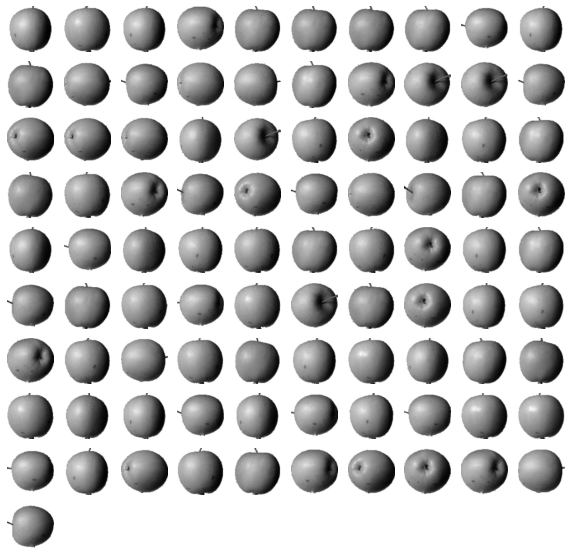

In [18]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)  
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:   
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()
    
draw_fruits(fruits[km.labels_==0])

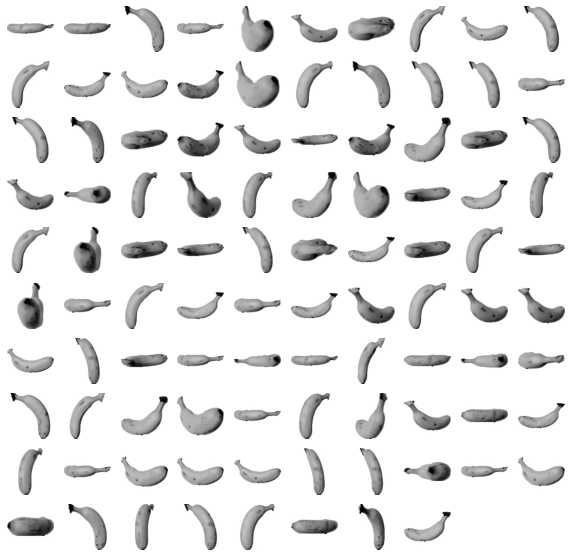

In [19]:
draw_fruits(fruits[km.labels_==1])

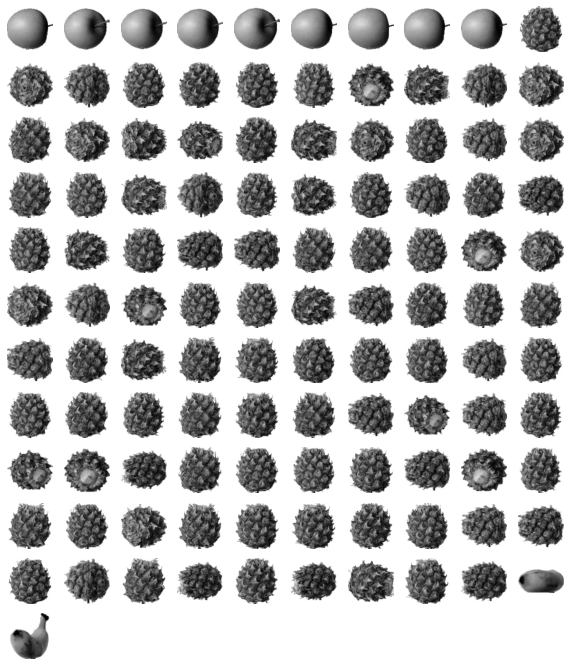

In [20]:
draw_fruits(fruits[km.labels_==2])

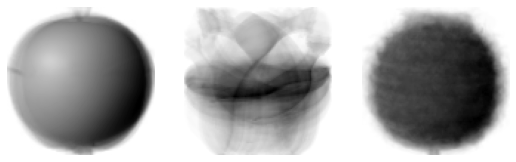

In [21]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [19]:
km.transform(fruits_2d[100:101])

array([[5267.70439881, 8837.37750892, 3393.8136117 ]])

In [20]:
km.predict(fruits_2d[100:101])

array([2])

In [21]:
fruits[100:101]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=uint8)

In [22]:
km.n_iter_

3

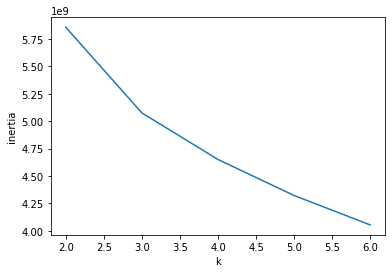

In [23]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이너셔는 클러스터의 샘플이 얼마나 가깝게 있는지 나타는 값으로 클러스터 중심과 샘플 사이 거리의 제곱 합으로 나타낼 수 있다. 클러스터 개수에 따라 이너셔 감소가 꺾이는 지점이 적절한 클러스터 k 값이라 하며 팔꿈치 모양을 띄고 있다 하여 엘보우 방법이라 한다.

### 주성분 분석

데이터가 가진 속성을 특성이라 불럿는데 특성 = 차원 으로도 불린다. 차원축소는 원본데이터의 특성을 축소하여 새로운 특성으로 변환하는 비지도 학습의 한 종류이다. 차원축소를 하게되면 저장공간이 줄어들고 성능또안 높일 수 있다. 

주성분 분석은 차원 축소 알고리즘으로 데이터에서 가장 큰 분산이 큰 방향을 찾는 방법이다. 

주성분이 원본데이터를 얼마나 잘 보존하여 분산을 나타내는지 기록한 것을 설명된 분산이라 하는데 explained_variance_ratio_로 확인ㅇ이 가능하다.

In [24]:
from sklearn.decomposition import PCA

fruits_2d = fruits.reshape(-1, 100*100)
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [25]:
pca.components_.shape

(50, 10000)

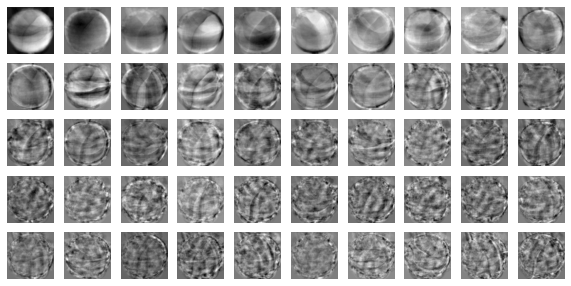

In [26]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [27]:
fruits_2d.shape

(300, 10000)

In [28]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [29]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [30]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

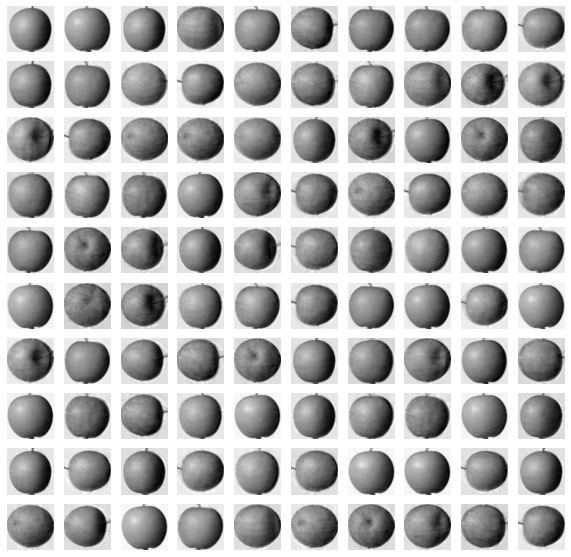

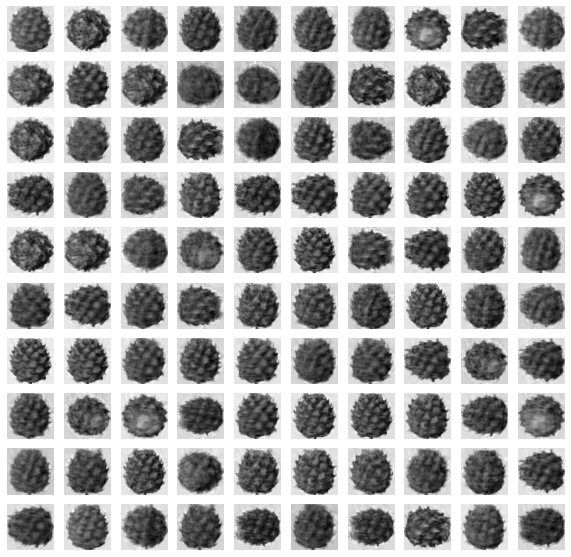

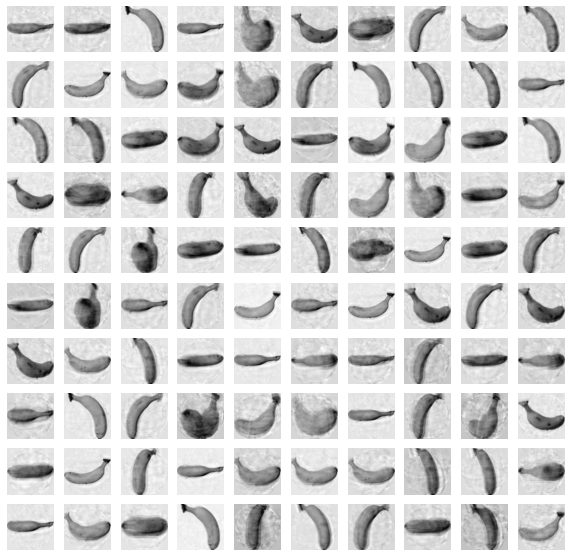

In [31]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [32]:
np.sum(pca.explained_variance_ratio_)

0.9214569684311835

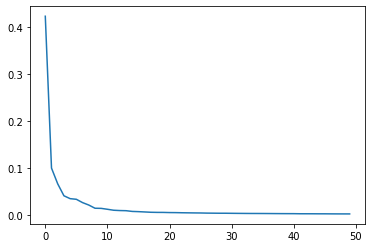

In [33]:
plt.plot(pca.explained_variance_ratio_)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [35]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2956664562225342


In [36]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.021006393432617187


In [37]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

2

In [38]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [39]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.035808134078979495


C:\Users\keoungchan\anaconda3\envs\ADFA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\keoungchan\anaconda3\envs\ADFA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

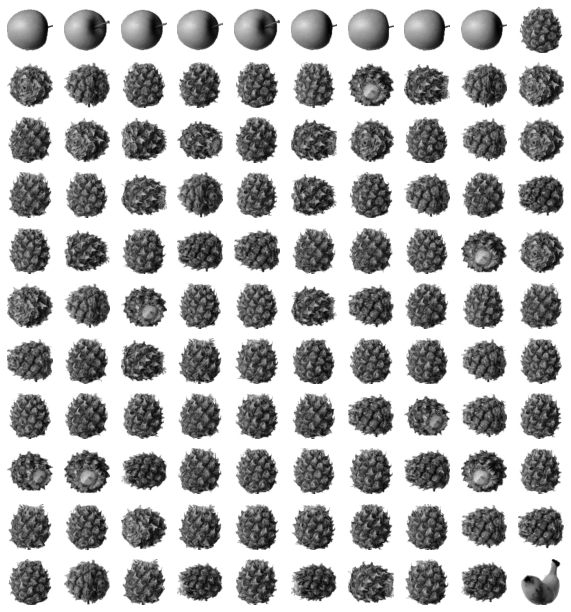

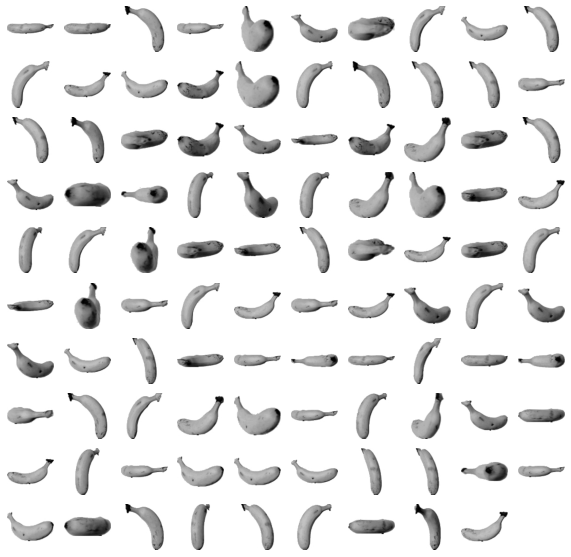

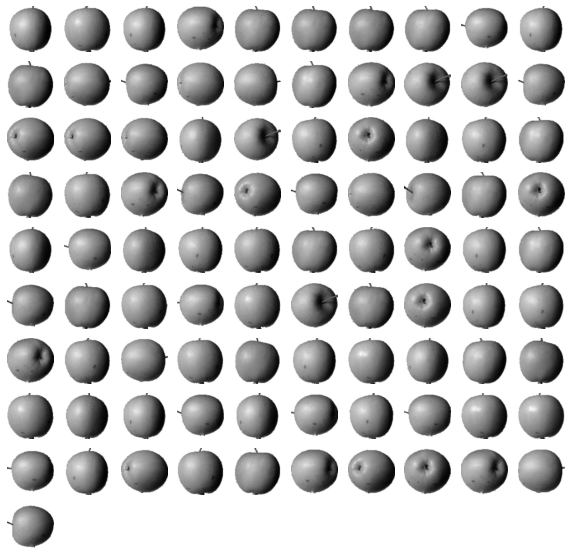

In [41]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

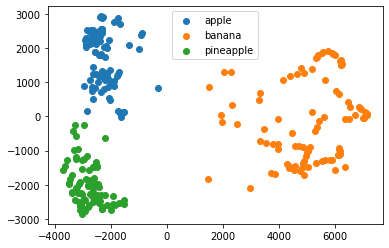

In [42]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()